# Building a Recommendation System and a Sentiment Analysis on Amazon Sales Dataset

In this project, a recommendation system and a sentiment analysis were built on the Amazon Sales Dataset. First,I built  a content-based recommendation system that suggests products based on their similarity to previously purchased products. Then,I performed  a sentiment analysis  on customer reviews to determine the overall sentiment of the reviews.


This project provides insights into customer preferences and helps businesses make data-driven decisions for product recommendations and marketing strategies.

#The Dataset:

In this project, we work with the Amazon Sales Dataset downloaded from Kaggle. The dataset contains information about over 1000 Amazon products, including their names, categories, prices, discounts, ratings, and reviews. We will use this dataset to build a recommendation system that suggests similar products to customers based on their previous purchases, as well as a sentiment analysis that identifies the sentiment expressed in customer reviews.
Here is the link to the dataset : https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset





In [ ]:
import pandas as pd
data = pd.read_csv('amazon.csv')
data.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Building a Product Recommender System using Cosine Similarity
This code demonstrates how to build a product recommender system using the Amazon Sales dataset. The TF-IDF vectorizer is used to convert the product descriptions into numerical feature vectors, which are then used to compute the cosine similarity matrix. A function is defined to get the top n similar products for a given product ID. The example usage shows how to get the top 10 similar products to the product with ID 'B074FZSQG7'.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Load the dataset
data = pd.read_csv('amazon.csv')

# Create a TF-IDF vectorizer to convert text to numerical feature vectors
tfidf = TfidfVectorizer(stop_words='english')

# Fill the missing values in 'about_product' column with empty strings
data['about_product'] = data['about_product'].fillna('')

# Compute the TF-IDF matrix for the 'about_product' column
tfidf_matrix = tfidf.fit_transform(data['about_product'])

# Compute the cosine similarity matrix based on the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a mapping of product IDs to their corresponding indices in the dataframe
id_to_index = pd.Series(data.index, index=data['product_id'])

# Define a function to get the top n similar products for a given product ID
def get_similar_products(product_id, n=10):
    # Get the index of the given product ID
    idx = id_to_index[product_id]
    # Get the pairwise similarity scores for all products
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: max(x[1]) if isinstance(x[1], np.ndarray) else x[1], reverse=True)

    # Get the indices of the top n similar products (excluding the given product)
    sim_indices = [i for i, s in sim_scores[1:n+1]]
    
    # Return the names and categories of the top n similar products
    return data.loc[sim_indices, ['product_name', 'category']]

# Example usage: get the top 10 similar products to the product with ID 'B074FZSQG7'
get_similar_products('B01486F4G6', n=10)


,product_name,category
1284,iBELL SM1301 3-in-1 Sandwich Maker with Detach...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1082,USHA Armor AR1100WB 1100 W Dry Iron with Black...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle..."
1324,iBELL SM1515NEW Sandwich Maker with Floating H...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1400,Borosil Prime Grill Sandwich Maker (Grey),Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1072,"Prestige Sandwich Maker PGMFD 01, Black",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1255,Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1336,AGARO Imperial 240-Watt Slow Juicer with Cold ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1391,"Lifelong LLSM120G Sandwich Griller , Classic P...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1065,Pigeon By Stovekraft ABS Plastic Acer Plus Ind...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1133,"Butterfly Smart Mixer Grinder, 750W, 4 Jars (G...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...


In [ ]:
from collections import defaultdict

def get_all_similar_products(data):
    # Create a dictionary to store the similar products for each product
    similar_products_dict = defaultdict(list)

    # Iterate over each product ID in the dataset
    for product_id in data['product_id']:
        print(f"Processing product ID {product_id}")
        
        # Get the similar products for the current product ID
        similar_products = get_similar_products(product_id, n=10)
        print(f"Found {len(similar_products)} similar products")
        
        # Check that similar_products is not empty before appending it to the dictionary
        if similar_products.shape[0] > 0:
            # Add the similar products to the dictionary
            similar_products_dict[product_id] = similar_products
    
    # Convert the dictionary to a DataFrame and save it to a CSV file
    similar_products_df = pd.DataFrame.from_dict(similar_products_dict, orient='index')
    similar_products_df.to_csv('similar_products.csv')
get_all_similar_products(data)


Processing product ID B07JW9H4J1
Found 2 similar products
Processing product ID B098NS6PVG
Found 2 similar products
Processing product ID B096MSW6CT
Found 2 similar products
Processing product ID B08HDJ86NZ
Found 2 similar products
Processing product ID B08CF3B7N1
Found 2 similar products
Processing product ID B08Y1TFSP6
Found 2 similar products
Processing product ID B08WRWPM22
Found 2 similar products
Processing product ID B08DDRGWTJ
Found 2 similar products
Processing product ID B008IFXQFU
Found 10 similar products
Processing product ID B082LZGK39
Found 1 similar products
Processing product ID B08CF3D7QR
Found 2 similar products
Processing product ID B0789LZTCJ
Found 1 similar products
Processing product ID B07KSMBL2H
Found 1 similar products
Processing product ID B085DTN6R2
Found 2 similar products
Processing product ID B09KLVMZ3B
Found 2 similar products
Processing product ID B083342NKJ
Found 2 similar products
Processing product ID B0B6F7LX4C
Found 10 similar products
Processing p

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


# Sentiment Analysis using TextBlob and Naive Bayes Classifier on Amazon Sales Dataset


This code performs sentiment analysis on the Amazon Sales dataset. It uses the TextBlob library to calculate the sentiment polarity for each review and assigns labels to the dataset based on the polarity. It then splits the dataset into training and testing sets, converts the reviews into a bag of words, and trains a Multinomial Naive Bayes classifier to predict the labels of the testing set. Finally, it calculates the accuracy of the model.


In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the Amazon Sales dataset
data = pd.read_csv("amazon.csv")

# Define a function to get the sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Add a new column with the sentiment polarity for each review
data['sentiment'] = data['review_content'].apply(get_sentiment_polarity)

# Assign labels to the dataset based on the sentiment polarity
data['label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_content'], data['label'], random_state=0)

# Convert the reviews into a bag of words
vectorizer = CountVectorizer().fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_bow)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9945504087193461


# A heatmap of the confusion matrix:

This code will create a heatmap of the confusion matrix, with the true labels on the y-axis and the predicted labels on the x-axis. The diagonal cells represent the number of correctly classified samples, while the off-diagonal cells represent the number of misclassified samples. The numbers inside each cell represent the count of samples that fall into that category. The colormap used in the heatmap is 'Reds', which is a sequential colormap with shades of red. The fmt='g' argument specifies the format of the numbers inside each cell (in this case, using a general format).

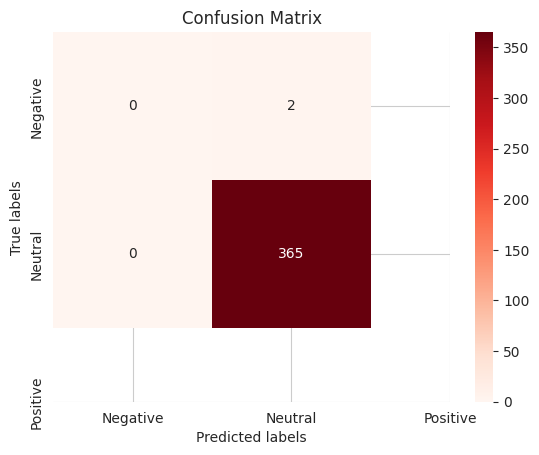

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set
y_pred = clf.predict(X_test_bow)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#Number of Reviews by Sentiment : 

This code will group the reviews by sentiment label ('positive' or 'negative'), count the number of reviews associated with each sentiment, and then create a bar chart using the Seaborn library to visualize the results. The resulting bar chart will display the number of reviews associated with each sentiment, with the x-axis showing the sentiment labels ('positive' or 'negative') and the y-axis showing the number of reviews.


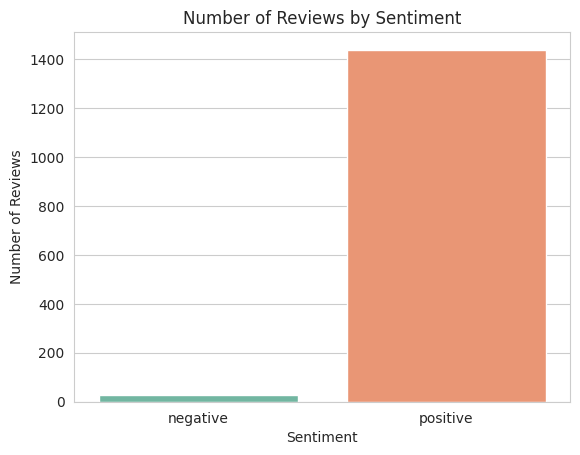

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Pandas DataFrame with sentiment and review_count columns
sentiment_counts = data.groupby('label').count()['review_content'].reset_index(name='review_count')

# Create a bar chart using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='label', y='review_count', data=sentiment_counts, palette='Set2')
plt.title('Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


# Distribution of Amazon Reviews by Sentiment Polarity Scores

This code loads the Amazon Sales dataset and performs sentiment analysis on the review_content column using TextBlob. It then creates a bar chart showing the distribution of reviews by sentiment polarity scores. This helps to understand the overall sentiment of the reviews for the products in the dataset.





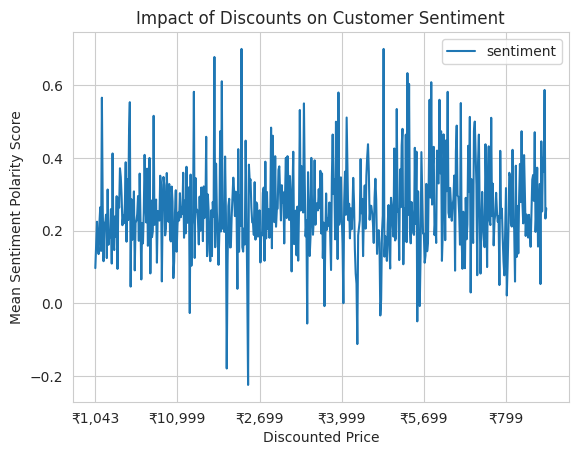

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Amazon Sales dataset
data = pd.read_csv("amazon.csv")

# Define a function to get the sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Add a new column with the sentiment polarity for each review
data['sentiment'] = data['review_content'].apply(get_sentiment_polarity)

# Group the data by whether the product was discounted or not and calculate the mean sentiment polarity score
discounted_sentiment = data.groupby('discounted_price')['sentiment'].mean()

# Create a line chart of the mean sentiment polarity score for discounted and non-discounted products
discounted_sentiment.plot(kind='line')
plt.xlabel('Discounted Price')
plt.ylabel('Mean Sentiment Polarity Score')
plt.title('Impact of Discounts on Customer Sentiment')
plt.legend()
plt.show()


The scatter plot shows the relationship between the sentiment polarity of the reviews and the discount percentage for the products. From the plot, ***it appears that there is no clear correlation between the two variables***. This means that offering discounts does not necessarily lead to more positive reviews from customers.

However, it is important to note that this analysis only considers a limited dataset and other factors such as product quality, customer service, and brand reputation may also have an impact on customer sentiment. Therefore, further analysis may be necessary to draw more conclusive insights.





# Identifying Common Themes in Customer Feedback using NLP
This code uses natural language processing techniques to identify common themes in customer feedback. By analyzing the text of customer reviews, the code can extract frequently mentioned features or aspects of products that customers mention in their reviews. This can help businesses identify areas of improvement and understand customer needs and preferences.

In [ ]:
import pandas as pd
import spacy
from collections import Counter

# Load the customer feedback dataset
df = pd.read_csv('amazon.csv')

# Load the pre-trained English language model in Spacy
nlp = spacy.load('en_core_web_sm')

# Define a function to extract the most common nouns from a piece of text
def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

# Apply the extract_nouns function to each piece of feedback in the dataset
feedback_nouns = df['review_content'].apply(extract_nouns)

# Count the frequency of each noun and select the top 10 most common nouns
common_nouns = Counter([noun for nouns in feedback_nouns for noun in nouns]).most_common(10)

# Print the top 10 most common nouns
print('Top 10 most common nouns in customer feedback:')
for noun, count in common_nouns:
    print(f'{noun}: {count} mentions')


Top 10 most common nouns in customer feedback:
product: 3418 mentions
quality: 2088 mentions
price: 1293 mentions
cable: 1254 mentions
phone: 1007 mentions
time: 822 mentions
battery: 670 mentions
money: 669 mentions
watch: 546 mentions
use: 485 mentions


# Identify Most Popular Categories and Products
This code groups data by category and product and counts the 
number of reviews for each, helping to identify the most popular categories and products among customers. The output shows the top 10 most popular categories and products based on the number of reviews they received.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('amazon.csv')

# Group the data by category and count the number of reviews for each
category_counts = data.groupby('category')['review_id'].count()

# Sort the categories by the number of reviews in descending order
popular_categories = category_counts.sort_values(ascending=False)

# Print the top 10 most popular categories
print(popular_categories.head(10))

# Group the data by product and count the number of reviews for each
product_counts = data.groupby('product_name')['review_id'].count()

# Sort the products by the number of reviews in descending order
popular_products = product_counts.sort_values(ascending=False)

# Print the top 10 most popular products
print(popular_products.head(10))


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Home&Kitch

The top category is "Computers & Accessories > Accessories & Peripherals > Cables & Accessories > Cables > USB Cables" with 233 reviews. This suggests that USB cables are a popular accessory for computer users.

The top product is "Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution" with 5 reviews. This suggests that this particular smartwatch is gaining popularity among customers.

Overall, these data points provide insight into what products and categories are popular among customers, which can be helpful for businesses and retailers to understand consumer trends and make informed decisions.